In [1]:
# Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report

In [3]:
# Load Dataset  and Data preprocessing

In [4]:
dataset = pd.read_csv('Rainfall.csv')

In [5]:
dataset.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,yes
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,yes
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,yes
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,yes
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,yes


In [6]:
dataset.shape

(366, 12)

In [7]:
# Check any null value in dataset

In [8]:
dataset.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
sunshine                  0
         winddirection    1
windspeed                 1
rainfall                  0
dtype: int64

In [9]:
# remove extra spaces and white spaces in the columns

In [10]:
dataset.columns = dataset.columns.str.strip()

In [11]:
dataset.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

In [12]:
# Cheeck data type and his information

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  365 non-null    float64
 10  windspeed      365 non-null    float64
 11  rainfall       366 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [14]:
# Fill null value using sinpleimputer

In [15]:
impute = SimpleImputer(strategy="mean")
impute.fit(dataset[["winddirection","windspeed"]] )

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [16]:
dataset[["winddirection","windspeed"]] = impute.transform(dataset[["winddirection","windspeed"]])

In [17]:
dataset.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [18]:
# Drop day column 

In [19]:
dataset.drop(columns="day", inplace=True)

In [20]:
dataset.head(1)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,yes


In [21]:
# Onehot Ending for cetagorical column "rainfall"


In [22]:
da = dataset[['rainfall']]
d = pd.get_dummies(da)
d.info()
one = OneHotEncoder(drop="first")
one.fit(da)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   rainfall_no   366 non-null    bool 
 1   rainfall_yes  366 non-null    bool 
dtypes: bool(2)
memory usage: 864.0 bytes


,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [23]:
a = one.transform(da).toarray()
dataset['rainfall'] = pd.DataFrame(a , columns =  ['rainfall_yes'])

In [24]:
dataset.head(1)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1.0


In [25]:
# Exploring Data Analysis (EDA)

In [26]:
# dataset['humidity'].unique()

In [27]:
dataset.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall'],
      dtype='object')

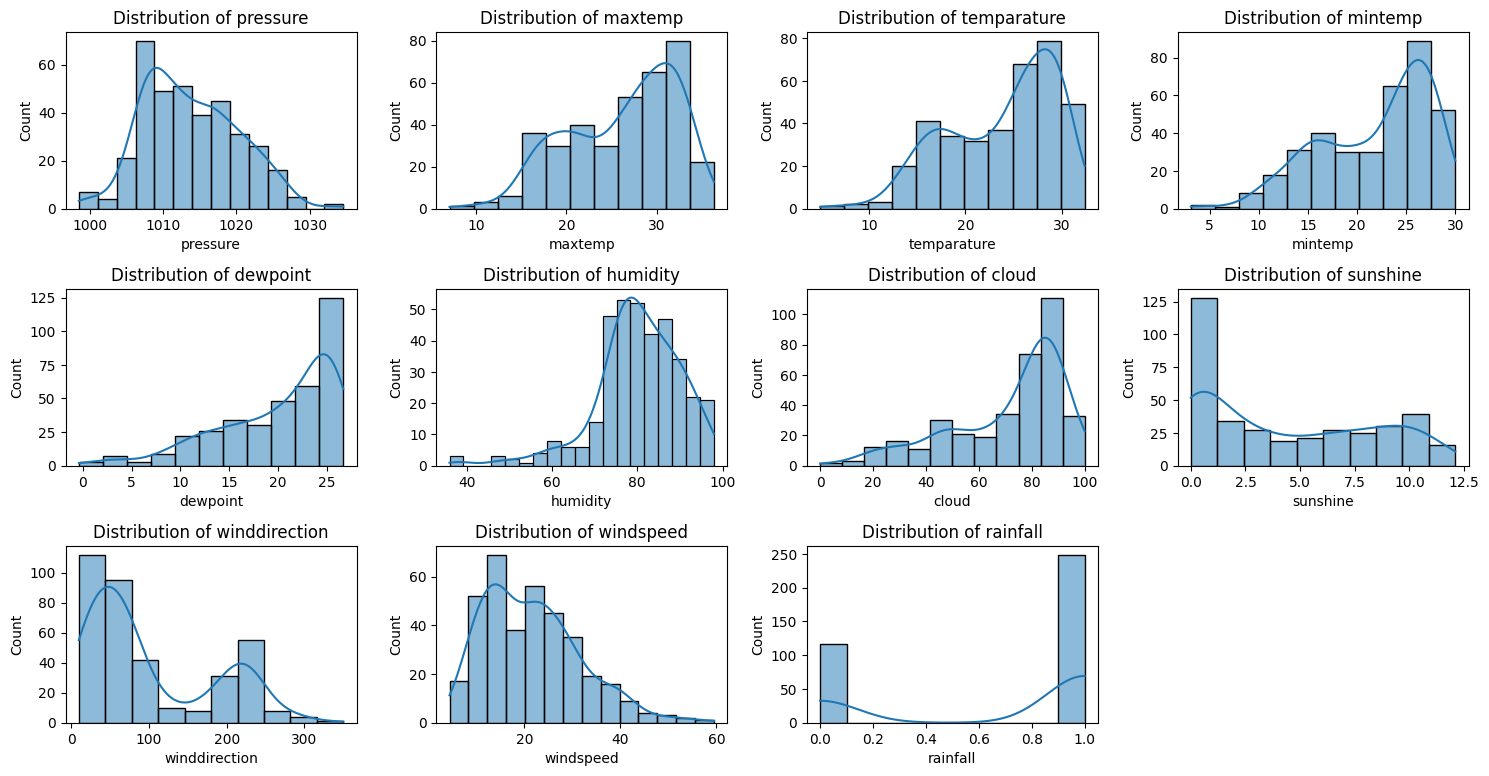

In [28]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall'], 1):
    
    plt.subplot(4, 4, i)
    sns.histplot(dataset[column],kde='True')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


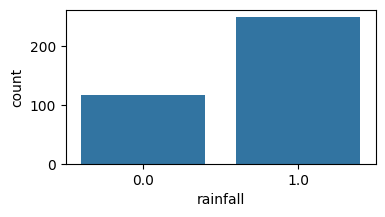

In [29]:
plt.figure(figsize=(4,2))
sns.countplot(data=dataset, x='rainfall')
plt.show()

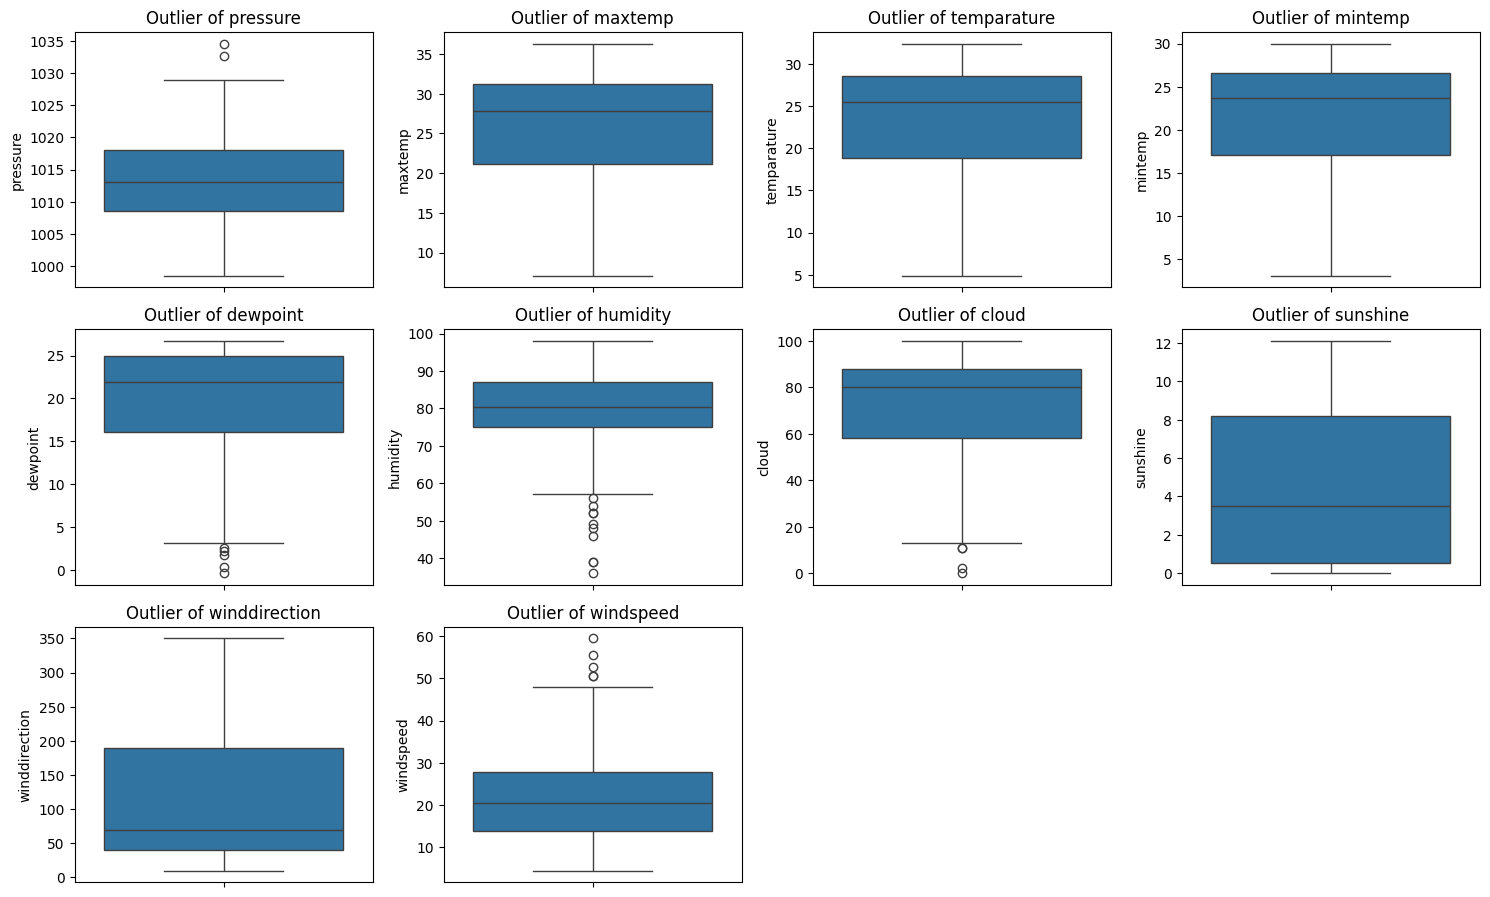

In [30]:
plt.figure(figsize=(15,12))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],1):
    plt.subplot(4,4,i)
    sns.boxplot(dataset[column])
    plt.title(f"Outlier of {column}")
plt.tight_layout()    
plt.show()    

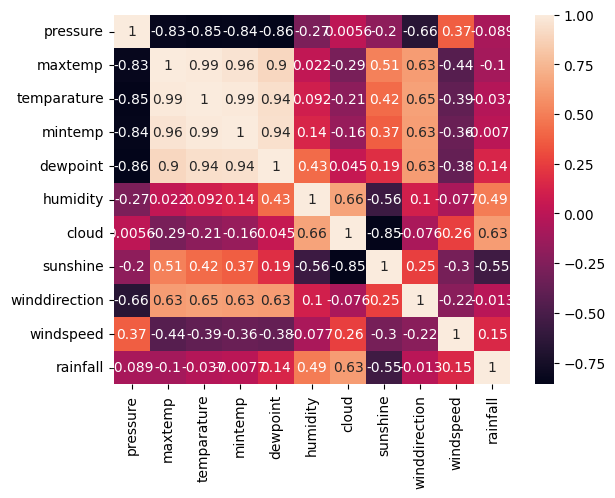

In [31]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [32]:
corr_matrix = dataset.corr()
corr_matrix['rainfall'].sort_values(ascending=False)

rainfall         1.000000
cloud            0.625766
humidity         0.489623
windspeed        0.154389
dewpoint         0.139916
mintemp         -0.007697
winddirection   -0.013206
temparature     -0.037360
pressure        -0.089275
maxtemp         -0.101003
sunshine        -0.552519
Name: rainfall, dtype: float64

In [33]:
dataset.drop(columns=['maxtemp','mintemp'], inplace=True)

In [34]:
# Check rainfall value

In [35]:
dataset['rainfall'].value_counts()

rainfall
1.0    249
0.0    117
Name: count, dtype: int64

In [36]:
# plt.figure(figsize=(15,10))
# for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
#        'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall'],1):
#     plt.subplot(4,4,i)
#     sns.histplot(dataset[column],kde=True)
#     plt.title(f"Distribute after for {column}")

# plt.tight_layout()
# plt.show()

In [37]:
# separate majority and minority class


In [38]:
df_majority = dataset[dataset["rainfall"] == 1]
df_minority = dataset[dataset["rainfall"] == 0]

In [39]:
print(df_majority.shape)
print(df_minority.shape)

(249, 9)
(117, 9)


In [40]:
# downsample majority class to match minority count

In [41]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [42]:
df_resampled = pd.concat([df_majority_downsampled, df_minority])

In [43]:
df_resampled.shape

(234, 9)

In [44]:
df_resampled.head(2)

,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
188,1005.9,30.2,25.6,77,53,10.5,270.0,11.3,1.0
9,1017.5,18.0,15.5,85,91,0.0,70.0,37.7,1.0


In [45]:
df_resampled['rainfall'].value_counts()

rainfall
1.0    117
0.0    117
Name: count, dtype: int64

In [46]:
# Split Input and output Data

In [47]:
x = df_resampled.iloc[:,:-1]
y = df_resampled['rainfall']
x.columns

Index(['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [48]:
# x = dataset.iloc[:,:-1]
# y = dataset['rainfall']

In [49]:
# Divide into train and test dataset

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=42, random_state=42)

In [51]:
x_train.shape, y_train.shape, y_test.shape

((192, 8), (192,), (42,))

In [52]:
# Scaling

In [53]:
sc = StandardScaler()
sc.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [54]:
x_train = pd.DataFrame(sc.transform(x_train), columns=x_train.columns)

In [55]:
x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

In [56]:
x_train.shape, x_test.shape, y_train.shape # when x,y

((192, 8), (42, 8), (192,))

In [57]:
# df = { "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
#        "gamma" : ['scale', 'auto'],
#        "degree" : [i for i in range(2,30)],
#        "probability": [False, True]}
       

In [58]:
# gb = GridSearchCV(SVC(), param_grid=df, cv=15)
# gb.fit(x_train,y_train)

In [59]:
# gb.best_params_

In [60]:
# gb.best_score_

In [61]:
# sm = SVC(kernel='rbf', probability=True,C=5, degree=2, gamma='scale')
# sm.fit(x_train,y_train)

In [62]:
# sm.score(x_train,y_train)*100, sm.score(x_test,y_test)*100

In [63]:
# mse = mean_squared_error(y_test,sm.predict(x_test))
# rems = np.sqrt(mse)
# mse,rems
                         

In [64]:
# s = cross_val_score(sm,x,y, cv=5)
# s.sort()
# s*100

In [65]:
# metrics.accuracy_score(y_test, lr.predict(x_test))

In [66]:
# metrics.accuracy_score(y_train, lr.predict(x_train))

In [67]:
# df1 = { "criterion" : ["gini", "entropy", "log_loss"],
#         "splitter" : ["best", "random"],
#         "max_depth" : [i for i in range(2,22)],
#         "min_samples_split" : [ 2,4,8,10],
#         "min_samples_leaf" : [1,2,4]}

In [68]:
# dgb = GridSearchCV(DecisionTreeClassifier(),param_grid=df1, cv=5)
# dgb.fit(x_train,y_train)

In [69]:
# dgb.best_params_

In [70]:
# dgb.best_score_

In [71]:
# dt = DecisionTreeClassifier(criterion= 'gini',
#  max_depth= 6,
#  min_samples_leaf= 2,
#  min_samples_split= 2,
#  splitter = 'random')
# dt.fit(x_train,y_train)
# dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

In [72]:
# mse = mean_squared_error(y_test,dt.predict(x_test))
# rems = np.sqrt(mse)
# mse,rems

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
# a = cross_val_score(dt,x,y, cv=5)
# a.sort()
# a*100


In [75]:
# gcb = GaussianNB()
# gcb.fit(x_train,y_train)
# gcb.score(x_train,y_train)*100, gcb.score(x_test,y_test)*100

In [76]:
# mse = mean_squared_error(y_test,gcb.predict(x_test))
# rems = np.sqrt(mse)
# mse,rems

In [77]:
# Model Traing

In [78]:
df2 = { "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]}

In [79]:
# rgb = GridSearchCV(RandomForestClassifier(),param_grid=df2,cv=5)
# rgb.fit(x_train,y_train)

In [80]:
# rgb.best_params_

In [81]:
# rgb.best_score_

In [113]:
rm = RandomForestClassifier(n_estimators=75,criterion='gini',min_samples_split=2,
    min_samples_leaf=1, max_depth=10, max_features='sqrt', random_state=12)

rm.fit(x_train,y_train)
rm.score(x_train,y_train)*100, rm.score(x_test,y_test)*100


(100.0, 83.33333333333334)

In [114]:
# Model Evolution

In [115]:
# Test model using Train data

In [116]:
y_pr = rm.predict(x_train)
y_pr

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1.])

In [117]:
y_train.values

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1.])

In [118]:
print("Traing accuracy", accuracy_score(y_train, y_pr))

Traing accuracy 1.0


In [119]:
# Test model using test data

In [120]:
y_prd = rm.predict(x_test)
y_prd

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0.])

In [121]:
y_test.values

array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.])

In [122]:
print("Test accuracy", accuracy_score(y_test, y_prd))

Test accuracy 0.8333333333333334


In [123]:
x_test.values[0]

array([ 1.26037276, -1.01120401, -0.87239337, -0.04695661,  0.99461187,
       -1.23865126, -0.8518771 ,  0.78066429])

In [124]:
resu = rm.predict([[ 1.26037276, -1.01120401, -0.87239337, -0.04695661,  0.99461187,
       -1.23865126, -0.8518771 ,  0.78066429]])
resu

C:\Users\amiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [125]:
y_test.values[0]

np.float64(1.0)

In [126]:
df_resampled['rainfall'].unique()[0]

np.float64(1.0)

In [127]:
print("Predicton Result: ", "Rainfall" if resu[0] == 1 else "No Rainfall")

Predicton Result:  Rainfall


In [128]:
# Model Evolution

In [129]:
r = cross_val_score(rm,x,y, cv=5)
r.sort()
r*100
np.mean(r)
print(r)
print(f"Cross validation mean score {np.mean(r)}")


[0.57446809 0.73913043 0.76595745 0.76595745 0.89361702]
Cross validation mean score 0.7478260869565216


In [130]:
mse = mean_squared_error(y_test,rm.predict(x_test))
ams = mean_absolute_error(y_test,rm.predict(x_test))
rems = np.sqrt(mse)
mse,rems,ams

(0.16666666666666666, np.float64(0.408248290463863), 0.16666666666666666)

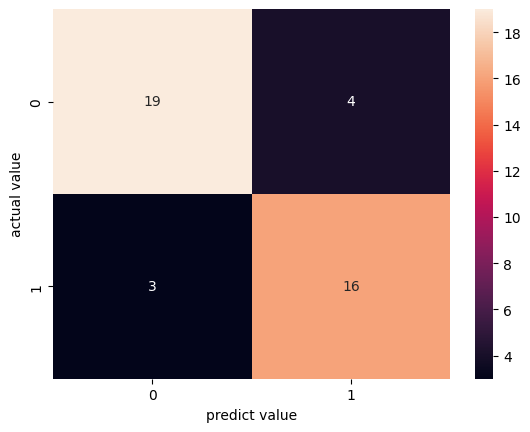

In [131]:
aa = confusion_matrix(y_test,rm.predict(x_test))
sns.heatmap(aa, annot=True)
plt.xlabel("predict value")
plt.ylabel("actual value")
# plt.savefig('beforere.png')
# plt.savefig('drop.png')

plt.show()

In [132]:
print(classification_report(y_test,
                                    rm.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84        23
         1.0       0.80      0.84      0.82        19

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



In [133]:
# Save model

In [134]:
from joblib import load, dump

In [135]:
dump(rm, 'rainmodel.joblib')

['rainmodel.joblib']

In [136]:
# Load model and testing model on test or random data

In [137]:
model = load('rainmodel.joblib')

In [138]:
x.values[10]

array([1019. ,   23.1,   16.8,   67. ,   88. ,    0. ,   50. ,   28.2])

In [139]:
input_data1 = pd.DataFrame([[1019. ,   23.1,   16.8,   67. ,   88. ,    0. ,   50. ,   28.2	]], columns=x.columns)

In [140]:
input_data1

,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1019.0,23.1,16.8,67.0,88.0,0.0,50.0,28.2


In [141]:
model.predict(input_data1)

array([1.])

In [142]:
y_test.values[10]

np.float64(0.0)

In [143]:
model.predict(x_test)

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0.])